## 1.Dataframes 

In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.express as px

In [14]:


data= yf.download(['BTC-USD','GC=F',"^GSPC"], start='2014-10-10', end='2023-10-26', group_by='ticker')
btc_adj_close = data['BTC-USD']['Adj Close'].interpolate()
gold_adj_close = data['GC=F']['Adj Close'].interpolate()
SP500_adj_close = data["^GSPC"]['Adj Close'].interpolate()

dataframe_btc= pd.DataFrame()

#Oro 
dataframe_btc["oro_precio"]=gold_adj_close
dataframe_btc["oro_log_rtn"] = np.log(gold_adj_close/gold_adj_close.shift(1))
dataframe_btc["oro_rtn"]=gold_adj_close.pct_change()
dataframe_btc["oro_rtn_acumulado"] = (1 + dataframe_btc["oro_rtn"]).cumprod() - 1
dataframe_btc["oro_low"]=data['GC=F']['Low'].interpolate()
dataframe_btc["oro_high"]=data['GC=F']['High'].interpolate()

#Sp500
dataframe_btc["sp500_precio"]=SP500_adj_close
dataframe_btc["sp500_log_rtn"] = np.log(SP500_adj_close/SP500_adj_close.shift(1))
dataframe_btc["sp500_rtn"]=dataframe_btc["sp500_precio"].pct_change()
dataframe_btc["sp500_rtn_acumulado"] = (1 + dataframe_btc["sp500_rtn"]).cumprod() - 1
dataframe_btc["sp500_low"]=data["^GSPC"]['Low'].interpolate()
dataframe_btc["sp500_high"]=data["^GSPC"]['High'].interpolate()

#Btc
dataframe_btc["btc_precio"]=btc_adj_close
dataframe_btc["btc_log_rtn"] = np.log(btc_adj_close/btc_adj_close.shift(1))
dataframe_btc["btc_rtn"]=dataframe_btc["btc_precio"].pct_change()
dataframe_btc["btc_rtn_acumulado"] = (1 + dataframe_btc["btc_rtn"]).cumprod() - 1
dataframe_btc["btc_low"]=data['BTC-USD']['Low'].interpolate()
dataframe_btc["btc_high"]=data['BTC-USD']['High'].interpolate()

dataframe_btc=dataframe_btc[1:]
dataframe_btc

[*********************100%%**********************]  3 of 3 completed


,oro_precio,oro_log_rtn,oro_rtn,oro_rtn_acumulado,oro_low,oro_high,sp500_precio,sp500_log_rtn,sp500_rtn,sp500_rtn_acumulado,sp500_low,sp500_high,btc_precio,btc_log_rtn,btc_rtn,btc_rtn_acumulado,btc_low,btc_high
Date,,,,,,,,,,,,,,,,,,
2014-10-11,1223.766683,0.002263,0.002266,0.002266,1220.333333,1227.000000,1895.666667,-0.005504,-0.005489,-0.005489,1895.413371,1928.683309,362.299011,0.002036,0.002038,0.002038,355.950989,367.191010
2014-10-12,1226.533366,0.002258,0.002261,0.004532,1223.666667,1230.500000,1885.203328,-0.005535,-0.005520,-0.010979,1884.776693,1920.386637,378.549011,0.043876,0.044852,0.046982,356.144012,379.433014
2014-10-13,1229.300049,0.002253,0.002256,0.006798,1227.000000,1234.000000,1874.739990,-0.005566,-0.005550,-0.016468,1874.140015,1912.089966,390.414001,0.030862,0.031343,0.079798,368.897003,397.226013
2014-10-14,1233.599976,0.003492,0.003498,0.010319,1233.599976,1235.900024,1877.699951,0.001578,0.001579,-0.014915,1871.790039,1898.709961,400.869995,0.026429,0.026782,0.108717,391.324005,411.697998
2014-10-15,1244.099976,0.008476,0.008512,0.018919,1243.699951,1247.000000,1862.489990,-0.008133,-0.008100,-0.022895,1820.660034,1874.180054,394.773010,-0.015326,-0.015209,0.091854,388.765991,402.226990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21,1980.433350,-0.001043,-0.001042,0.621977,1977.900024,1985.366659,4221.786784,-0.000562,-0.000562,1.214847,4211.759928,4269.653320,29918.412109,0.007901,0.007933,81.747665,29481.751953,30287.482422
2023-10-22,1978.366699,-0.001044,-0.001044,0.620284,1975.400024,1982.133341,4219.413411,-0.000562,-0.000562,1.213602,4200.490072,4262.746582,29993.896484,0.002520,0.002523,81.956438,29720.312500,30199.433594
2023-10-23,1976.300049,-0.001045,-0.001045,0.618591,1972.900024,1978.900024,4217.040039,-0.000563,-0.000562,1.212357,4189.220215,4255.839844,33086.234375,0.098123,0.103099,90.509156,30097.828125,34370.437500


In [15]:
# Descargar datos de SPY (S&P 500 ETF) desde Yahoo Finance
sp500 = yf.download("^GSPC", start='2005-01-01', end='2023-10-10')
oro = yf.download('GC=F', start='2005-01-01', end='2023-10-10')
ibex35 = yf.download("^IBEX", start='2005-01-01', end='2023-10-10')
#merged_data = pd.merge(oro, sp500, on='date', how='outer')
dataframe= pd.DataFrame()

#Oro
dataframe["oro_precio"]=oro["Adj Close"]
dataframe["oro_log_rtn"] = np.log(oro["Adj Close"]/oro["Adj Close"].shift(1))
dataframe["oro_rtn"]=oro["Adj Close"].pct_change()
dataframe["oro_rtn_acumulado"] = (1 + dataframe["oro_rtn"]).cumprod() - 1

#Sp500
dataframe["sp500_precio"]=sp500["Adj Close"].interpolate()
dataframe["sp500_log_rtn"] = np.log(dataframe["sp500_precio"]/dataframe["sp500_precio"].shift(1))
dataframe["sp500_rtn"]=dataframe["sp500_precio"].pct_change()
dataframe["sp500_rtn_acumulado"] = (1 + dataframe["sp500_rtn"]).cumprod() - 1

#ibex35
dataframe = dataframe.merge(ibex35["Adj Close"], how='left', left_index=True, right_index=True)
dataframe["Adj Close"].fillna(method='ffill', inplace=True)
dataframe.rename(columns={'Adj Close': 'ibex35_precio'}, inplace=True)
dataframe["ibex35_log_rtn"] = np.log(dataframe["ibex35_precio"]/dataframe["ibex35_precio"].shift(1))
dataframe["ibex35_rtn"]=dataframe["ibex35_precio"].pct_change()
dataframe["ibex35_rtn_acumulado"] = (1 + dataframe["ibex35_rtn"]).cumprod() - 1
dataframe=dataframe[1:].interpolate()
dataframe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/1035119321.py:17: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  dataframe["sp500_rtn"]=dataframe["sp500_precio"].pct_change()
/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/1035119321.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe["Adj Close"].fillna(method='ffill', inplace=True)


,oro_precio,oro_log_rtn,oro_rtn,oro_rtn_acumulado,sp500_precio,sp500_log_rtn,sp500_rtn,sp500_rtn_acumulado,ibex35_precio,ibex35_log_rtn,ibex35_rtn,ibex35_rtn_acumulado
Date,,,,,,,,,,,,
2005-01-04,428.500000,-0.000467,-0.000467,-0.000467,1188.050049,-0.011740,-0.011671,-0.011671,9119.991211,-0.000449,-0.000449,-0.000449
2005-01-05,426.600006,-0.004444,-0.004434,-0.004899,1183.739990,-0.003634,-0.003628,-0.015257,9024.391602,-0.010538,-0.010482,-0.010927
2005-01-06,421.000000,-0.013214,-0.013127,-0.017961,1187.890015,0.003500,0.003506,-0.011804,9024.391602,0.000000,0.000000,-0.010927
2005-01-07,418.899994,-0.005001,-0.004988,-0.022860,1186.189941,-0.001432,-0.001431,-0.013219,9041.090820,0.001849,0.001850,-0.009097
2005-01-10,419.100006,0.000477,0.000477,-0.022393,1190.250000,0.003417,0.003423,-0.009841,9028.491211,-0.001395,-0.001394,-0.010478
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-03,1824.599976,-0.002955,-0.002951,3.256123,4229.450195,-0.013839,-0.013744,2.518443,9165.500000,-0.016609,-0.016472,0.004538
2023-10-04,1818.500000,-0.003349,-0.003343,3.241894,4263.750000,0.008077,0.008110,2.546977,9102.900391,-0.006853,-0.006830,-0.002322
2023-10-05,1816.599976,-0.001045,-0.001045,3.237462,4258.189941,-0.001305,-0.001304,2.542352,9157.700195,0.006002,0.006020,0.003684


In [16]:
if dataframe_btc.isna().any().any():
    print("El DataFrame contiene al menos un valor NaN.")
else:
    print("El DataFrame no contiene valores NaN.")
    
if dataframe.isna().any().any():
    print("El DataFrame contiene al menos un valor NaN.")
else:
    print("El DataFrame no contiene valores NaN.")

El DataFrame no contiene valores NaN.
El DataFrame no contiene valores NaN.


In [17]:
def graficar_correlacion(a,b,titulo):
    correlation_static = a.corr(b)
    correlation_moving = a.rolling(window=30).corr(b)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dataframe_btc, x=dataframe_btc.index, y=correlation_static * pd.Series(1, index=dataframe_btc.index), label='Correlación Estática', color='blue', linewidth=2)
    sns.lineplot(data=dataframe_btc, x=dataframe_btc.index, y=correlation_moving, label='Correlación Móvil (ventana de 30 días)', color='red', linewidth=2)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Correlación', fontsize=12)
    plt.title(f'{titulo}', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

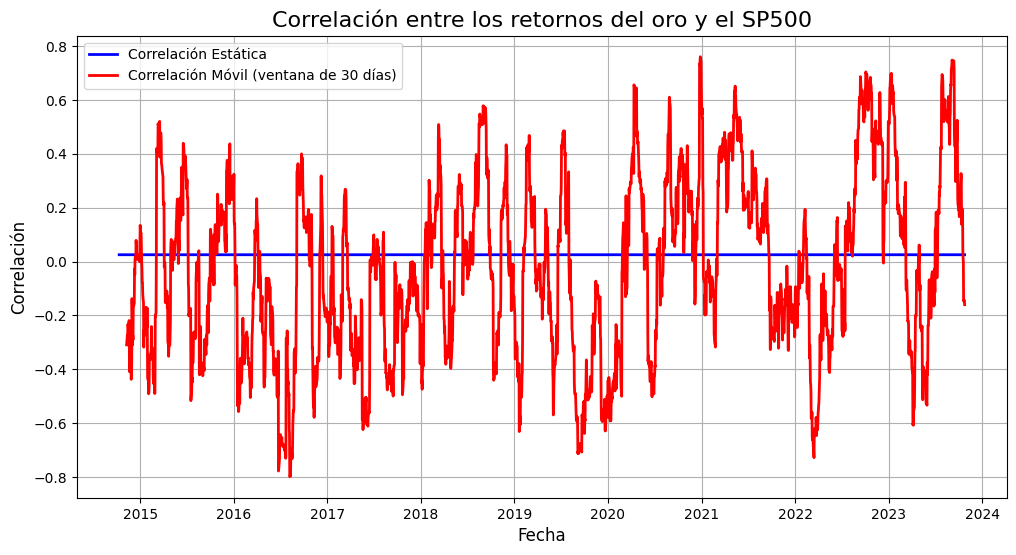

In [18]:
graficar_correlacion(dataframe_btc["oro_log_rtn"],dataframe_btc["sp500_log_rtn"], "Correlación entre los retornos del oro y el SP500")

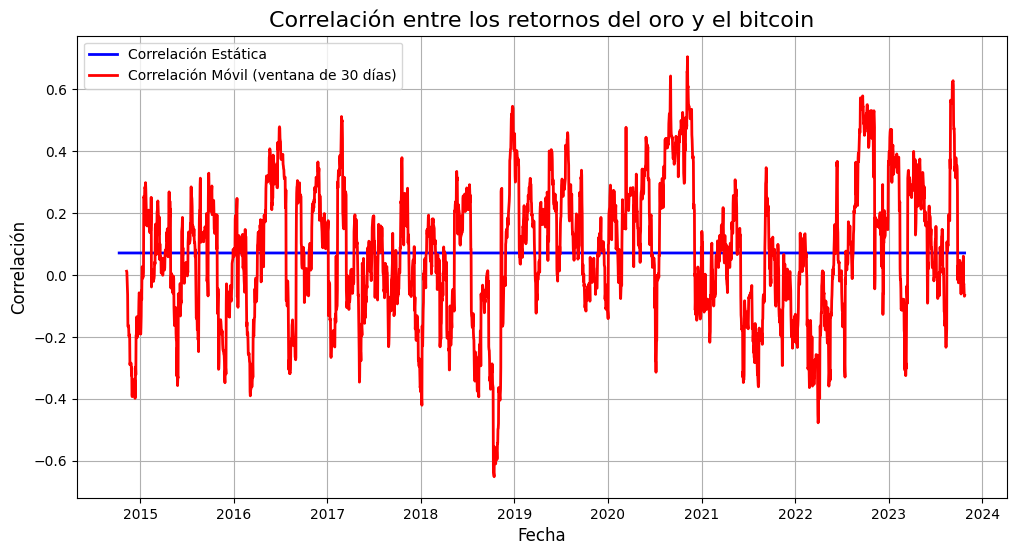

In [19]:
graficar_correlacion(dataframe_btc["oro_log_rtn"],dataframe_btc["btc_log_rtn"], "Correlación entre los retornos del oro y el bitcoin")

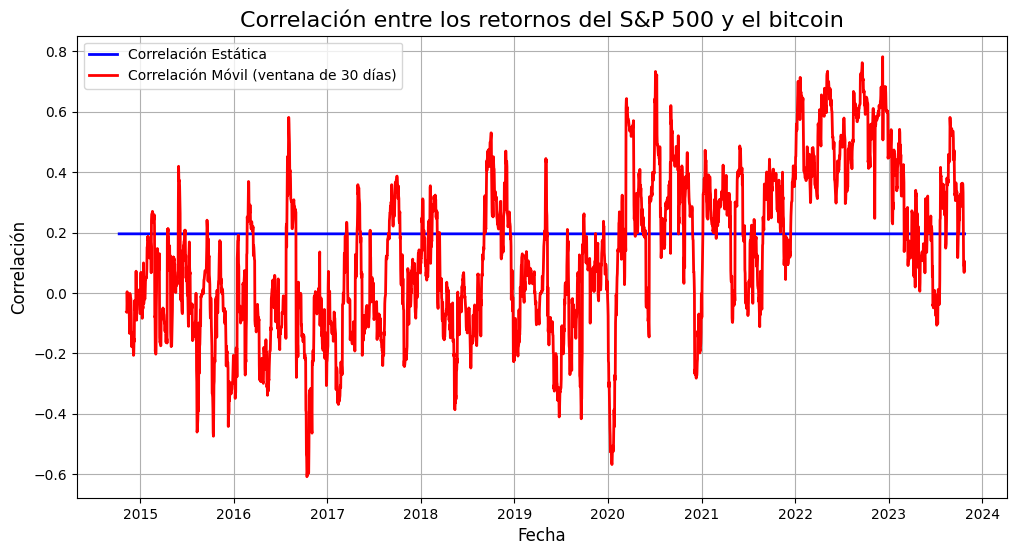

In [20]:
graficar_correlacion(dataframe_btc["sp500_log_rtn"],dataframe_btc["btc_log_rtn"], "Correlación entre los retornos del S&P 500 y el bitcoin")

## 2.Estudiar las distribuciones de los retornos

Por razones que veremos más adelante, es importante saber que tipo de distribución tienen nuestros datos. En nuestro caso, es especialmente relevante estudiar la distribución de los retornos. 

### 2.1 Distribución de los retornos del oro

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/2049813237.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie, kde=False,


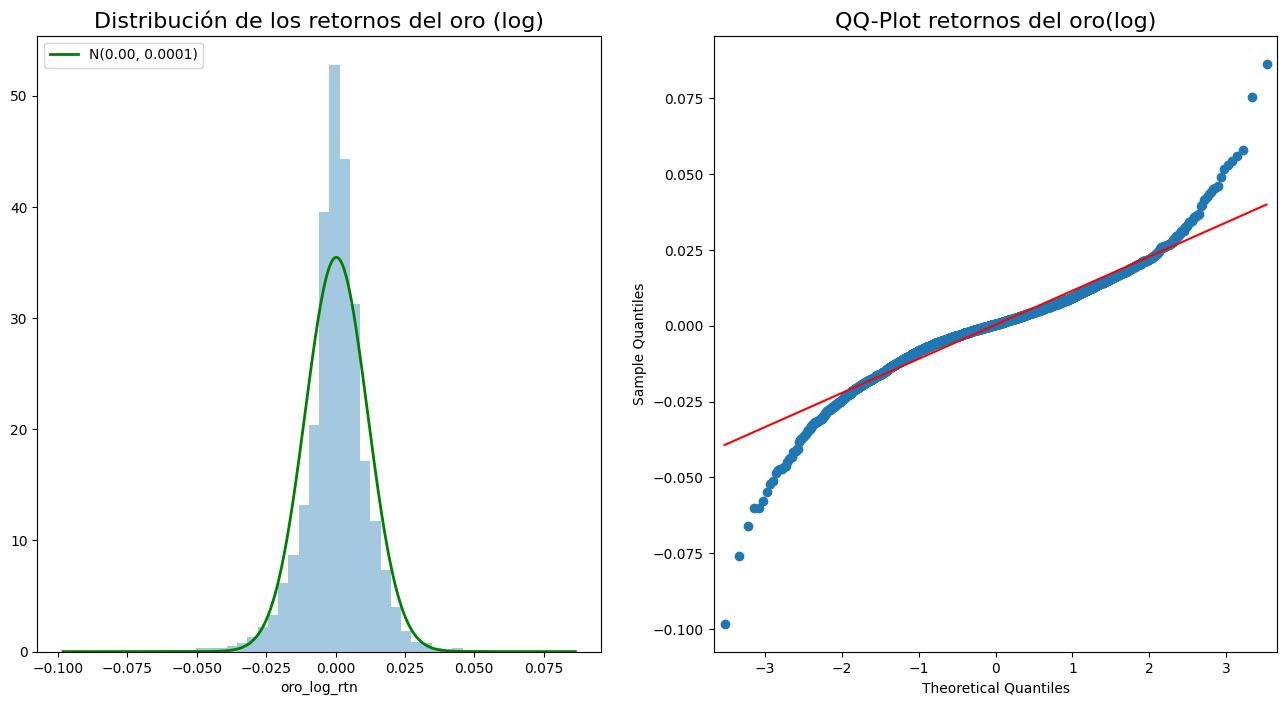

Skewness: -0.3205
Kurtosis: 5.5520
Jarque-Bera statistic: 6122.16 with p-value: 0.00


In [21]:
def histograma_qqplot(serie,titulo_histograma,titulo_qqplot):
    r_range = np.linspace(min(serie), 
                        max(serie), 
                        num=1000)
    mu = serie.mean()
    sigma = serie.std()
    norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma) 
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    # histogram
    sns.distplot(serie, kde=False, 
                norm_hist=True, ax=ax[0])                                    
    ax[0].set_title(titulo_histograma, 
                    fontsize=16)                                                    
    ax[0].plot(r_range, norm_pdf, "g", lw=2, 
            label=f"N({mu:.2f}, {sigma**2:.4f})")
    ax[0].legend(loc="upper left")
    
    # Q-Q plot
    qq = sm.qqplot(serie.values, line="s", ax=ax[1])
    ax[1].set_title(titulo_qqplot, fontsize=16)
    plt.show()
histograma_qqplot(dataframe["oro_log_rtn"],"Distribución de los retornos del oro (log)","QQ-Plot retornos del oro(log)")
def info_distribución(serie):
    jb_test = scs.jarque_bera(serie.values)
    print(f"Skewness: {serie.skew():.4f}")
    print(f"Kurtosis: {serie.kurtosis():.4f}") 
    print(f"Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}")

info_distribución(dataframe["oro_log_rtn"])


/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/2049813237.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie, kde=False,


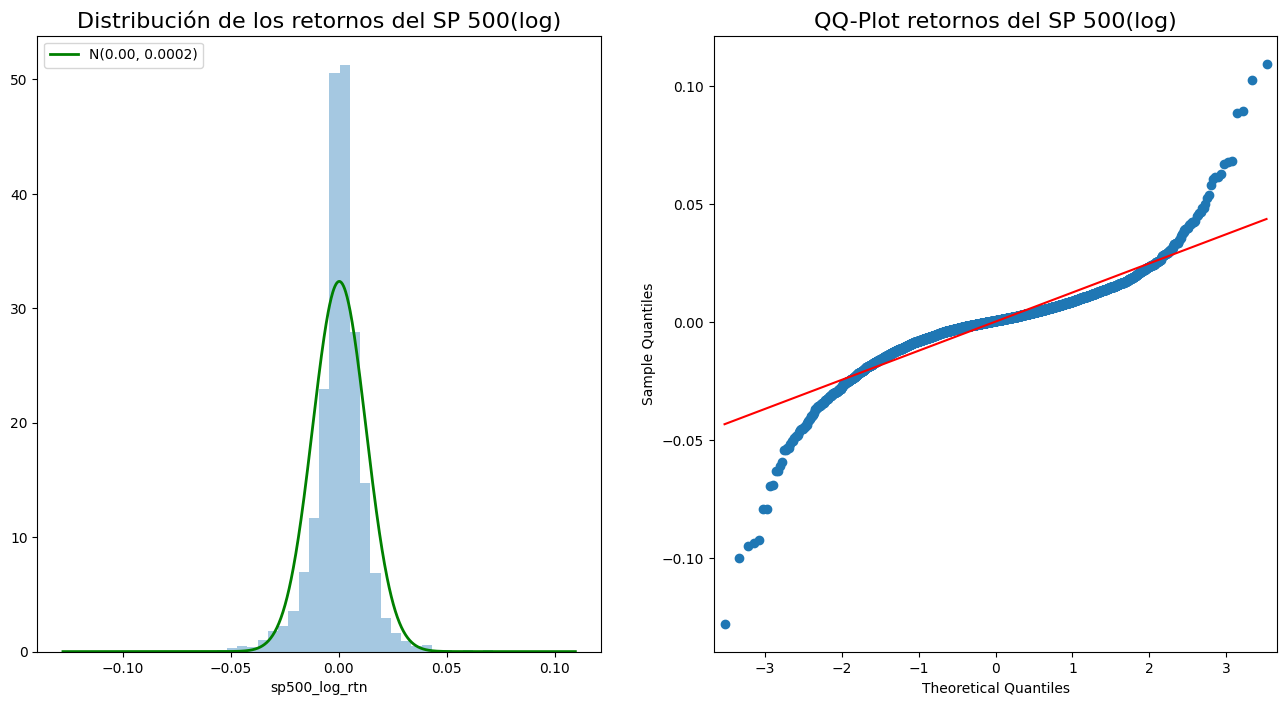

Skewness: -0.5213
Kurtosis: 12.8213
Jarque-Bera statistic: 32440.25 with p-value: 0.00


In [22]:
histograma_qqplot(dataframe["sp500_log_rtn"],"Distribución de los retornos del SP 500(log)", "QQ-Plot retornos del SP 500(log)")
info_distribución(dataframe["sp500_log_rtn"])


/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/2049813237.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie, kde=False,


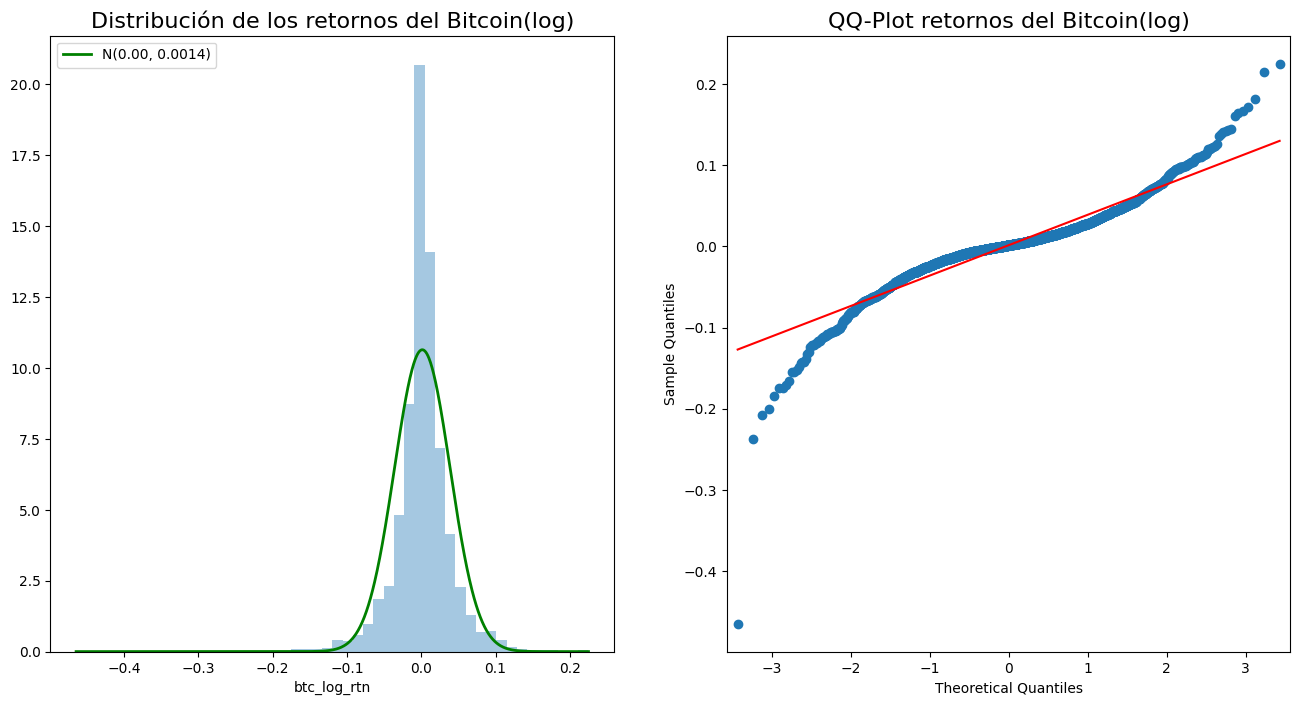

Skewness: -0.7681
Kurtosis: 11.4614
Jarque-Bera statistic: 18331.96 with p-value: 0.00


In [23]:
histograma_qqplot(dataframe_btc[1:]["btc_log_rtn"],"Distribución de los retornos del Bitcoin(log)", "QQ-Plot retornos del Bitcoin(log)")
info_distribución(dataframe_btc[1:]["btc_log_rtn"])



## 3.Volatilidad y rentabilidad 

In [24]:
def grafica_precio_retornos_volatilidad(retornos,precios,titulo):
    volatilidad_252 = retornos.rolling(window=252).std()
    volatilidad_21 = retornos.rolling(window=21).std()

    fig, ax = plt.subplots(3, 1, figsize=(18, 15),
                        sharex=True)
    precios.plot(ax=ax[0])
    ax[0].set(title=titulo,
            ylabel="Price ($)")
    retornos.plot(ax=ax[1])
    ax[1].set(ylabel="Log returns")
    volatilidad_252.plot(ax=ax[2], color="r",
                            label="Rolling Volatility 252d")
    volatilidad_21.plot(ax=ax[2], color="g",
                            label="Rolling Volatility 21d")
    ax[2].set(ylabel="Moving Volatility",
            xlabel="Date")
    ax[2].legend()
    plt.show()

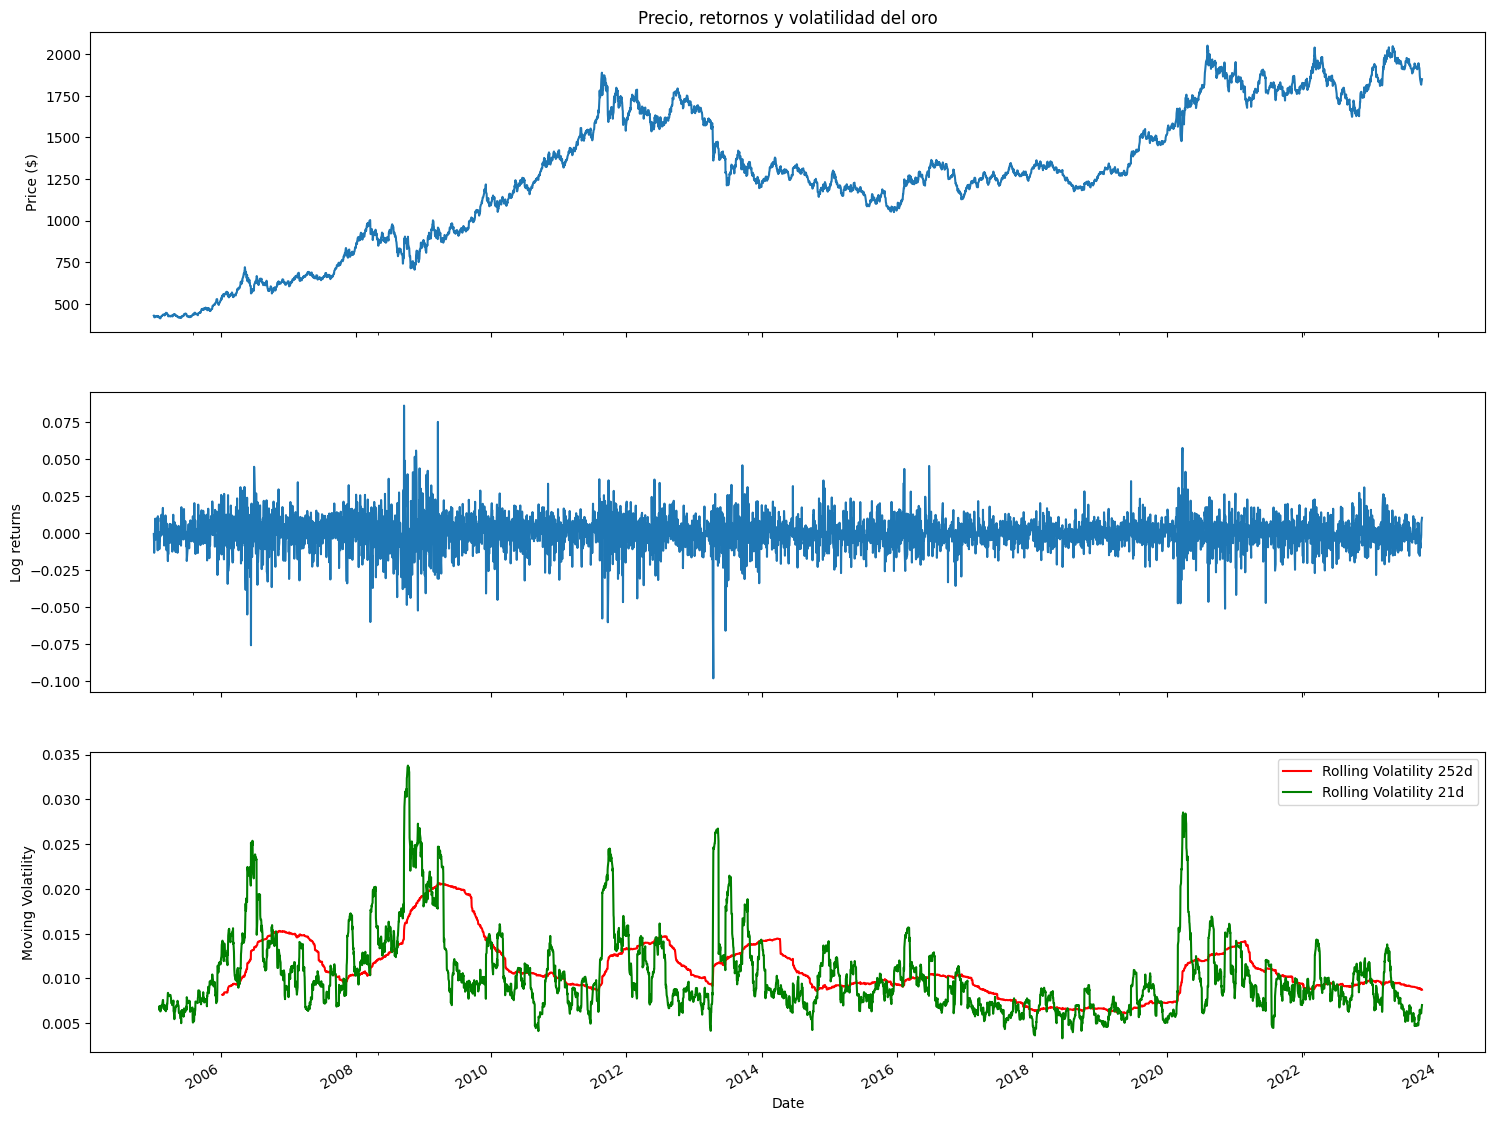

In [25]:
grafica_precio_retornos_volatilidad(dataframe["oro_log_rtn"],dataframe["oro_precio"], "Precio, retornos y volatilidad del oro")

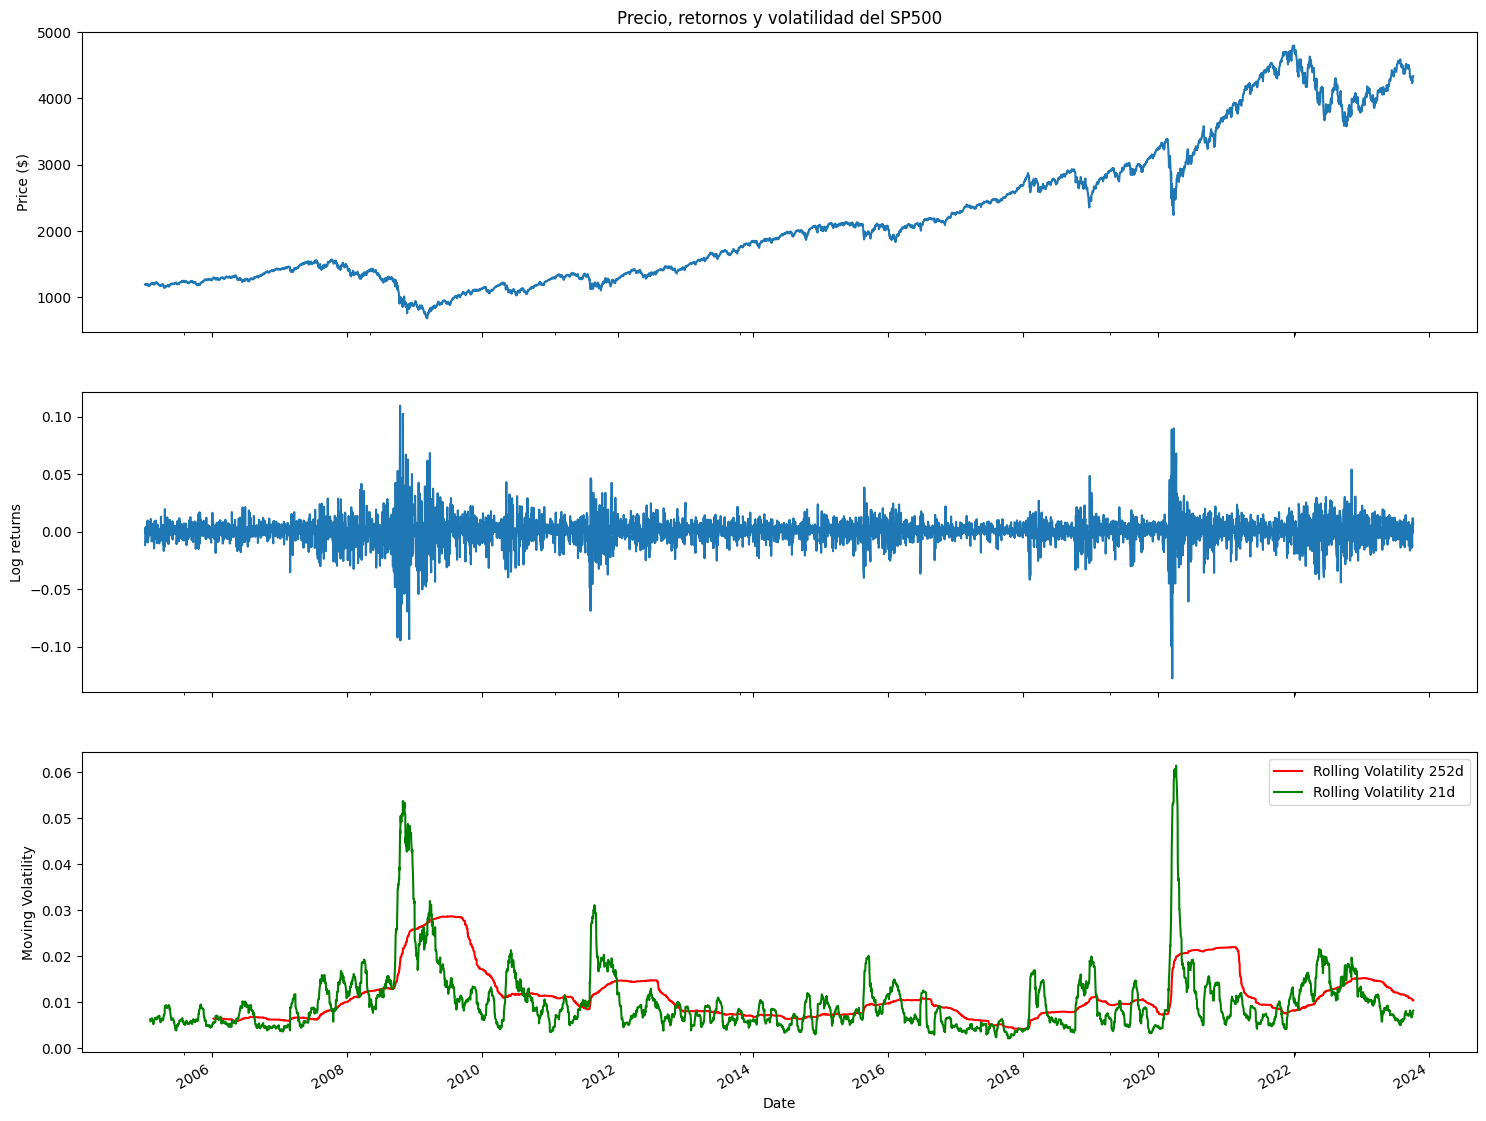

In [26]:
grafica_precio_retornos_volatilidad(dataframe["sp500_log_rtn"],dataframe["sp500_precio"], "Precio, retornos y volatilidad del SP500")

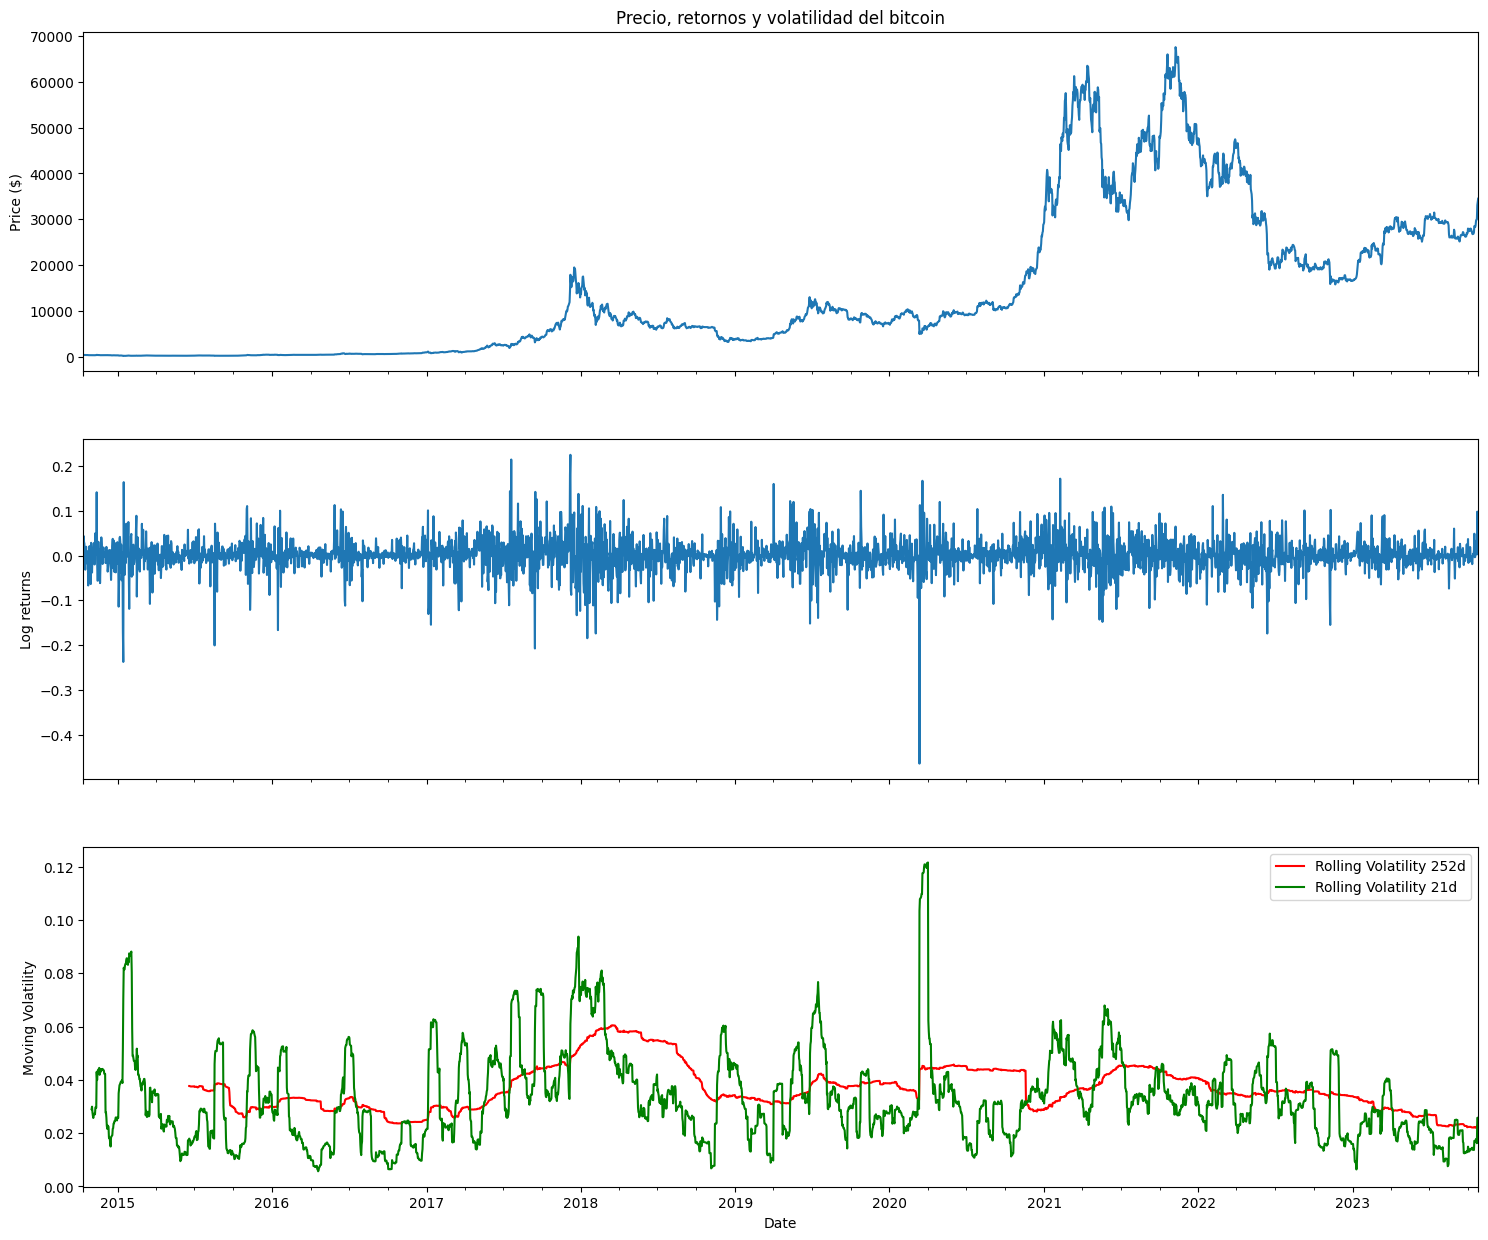

In [27]:
grafica_precio_retornos_volatilidad(dataframe_btc["btc_log_rtn"],dataframe_btc["btc_precio"], "Precio, retornos y volatilidad del bitcoin")

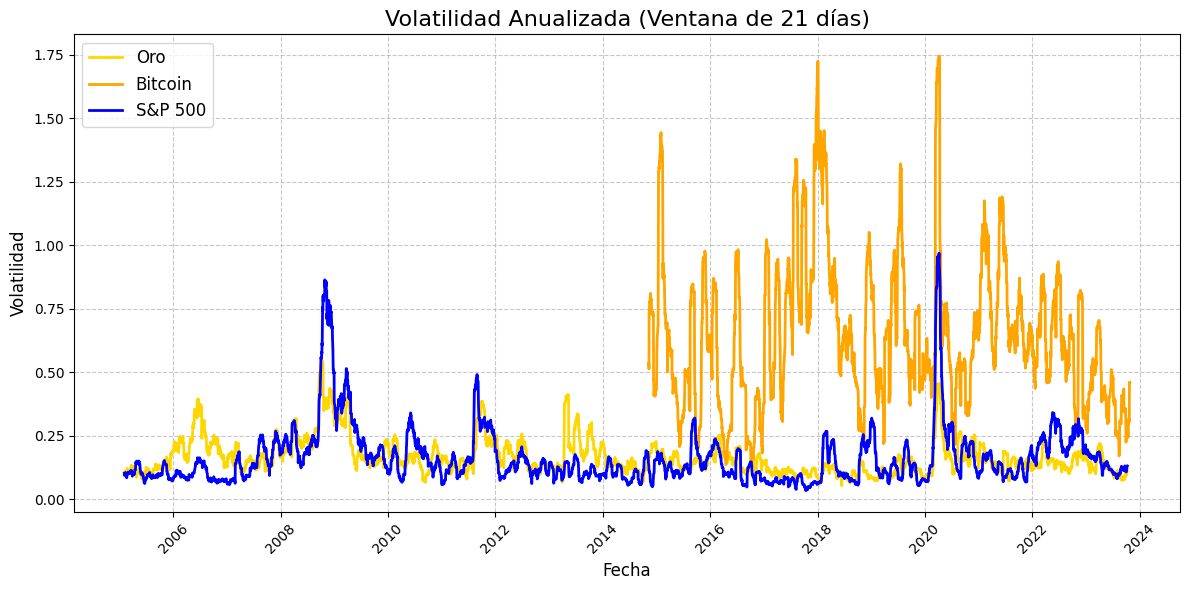

In [28]:
vol_oro=dataframe["oro_rtn"].rolling(window=21).std()*np.sqrt(252)
vol_btc=dataframe_btc["btc_rtn"].rolling(window=30).std()*np.sqrt(365)
vol_sp500=dataframe["sp500_rtn"].rolling(window=21).std()*np.sqrt(252)



plt.figure(figsize=(12, 6))
plt.plot(vol_oro, label='Oro', color='gold', linewidth=2)
plt.plot(vol_btc, label='Bitcoin', color='orange', linewidth=2)
plt.plot(vol_sp500, label='S&P 500', color='blue', linewidth=2)

plt.title('Volatilidad Anualizada (Ventana de 21 días)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volatilidad', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()


In [29]:
vol_anual_oro=  (dataframe_btc["oro_rtn"].std()*np.sqrt(365))*100
rentabilidad_anualizada_oro= (dataframe_btc["oro_rtn"].mean()*365)*100
print(vol_anual_oro,rentabilidad_anualizada_oro)

vol_anual_sp500=  (dataframe_btc["sp500_rtn"].std()*np.sqrt(365))*100
rentabilidad_anualizada_sp500= (dataframe_btc["sp500_rtn"].mean()*365)*100
print(vol_anual_sp500,rentabilidad_anualizada_sp500)

vol_anual_btc=  (dataframe_btc["btc_rtn"].std()*np.sqrt(365))*100
rentabilidad_anualizada_btc= (dataframe_btc["btc_rtn"].mean()*365)*100
print(vol_anual_btc,rentabilidad_anualizada_btc)





13.555837605906984 6.285168748837896
16.70459182296584 10.094266117550427
71.04904534865697 75.88599559596196


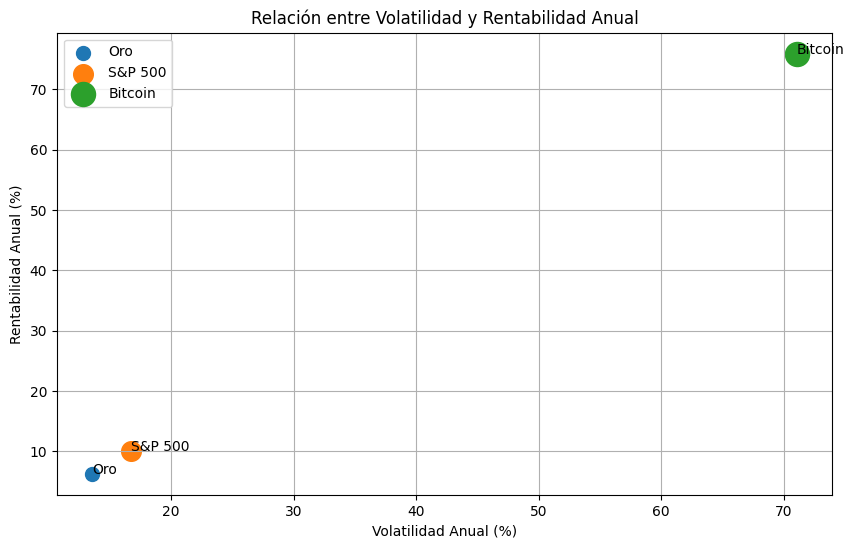

In [30]:
activos = ["Oro", "S&P 500", "Bitcoin"]
volatilidades = [vol_anual_oro,
                 vol_anual_sp500,
                vol_anual_btc]
rentabilidades_anuales = [rentabilidad_anualizada_oro,
                          rentabilidad_anualizada_sp500,
                          rentabilidad_anualizada_btc]
tamaños = [100, 200, 300]  


fig, ax = plt.subplots(figsize=(10, 6))
for i, activo in enumerate(activos):
    ax.scatter(volatilidades[i], rentabilidades_anuales[i], s=tamaños[i], label=activo)
ax.set_xlabel('Volatilidad Anual (%)')
ax.set_ylabel('Rentabilidad Anual (%)')
ax.set_title('Relación entre Volatilidad y Rentabilidad Anual')
ax.legend()
plt.grid(True)
for i, activo in enumerate(activos):
    ax.annotate(activo, (volatilidades[i], rentabilidades_anuales[i]))

plt.show()

### 3.1 

La volatilidad es igualmente sensible a los retornos positivos y negativos. Dado que lo que nos interesa es la volatilidad como medida de riesgo, veremos las diferencias en la volatilidad dependiendo de si los retornos son positivos o negativos.

In [31]:
dataframe_btc["vol_negativos_oro"]=np.where(dataframe_btc["oro_rtn"]<0, 100* (dataframe_btc["oro_high"]-dataframe_btc["oro_low"])/dataframe_btc["oro_low"],0)
vol_negativos_oro=dataframe_btc.loc[dataframe_btc["vol_negativos_oro"]!=0]
dataframe_btc["vol_positivos_oro"]=np.where(dataframe_btc["oro_rtn"]>0, 100* (dataframe_btc["oro_high"]-dataframe_btc["oro_low"])/dataframe_btc["oro_low"],0)
vol_positivos_oro=dataframe_btc.loc[dataframe_btc["vol_positivos_oro"]!=0]
ratio_vol_oro= (vol_negativos_oro["vol_negativos_oro"].mean())/(vol_positivos_oro["vol_positivos_oro"].mean())
print(vol_negativos_oro["vol_negativos_oro"].mean(),vol_positivos_oro["vol_positivos_oro"].mean())
print(ratio_vol_oro)




0.9988499916230263 0.9852461869833733
1.013807518181121


In [32]:
dataframe_btc["vol_negativos_sp500"]=np.where(dataframe_btc["sp500_rtn"]<0, 100* (dataframe_btc["sp500_high"]-dataframe_btc["sp500_low"])/dataframe_btc["sp500_low"],0)
vol_negativos_sp500=dataframe_btc.loc[dataframe_btc["vol_negativos_sp500"]!=0]
dataframe_btc["vol_positivos_sp500"]=np.where(dataframe_btc["sp500_rtn"]>0, 100* (dataframe_btc["sp500_high"]-dataframe_btc["sp500_low"])/dataframe_btc["sp500_low"],0)
vol_positivos_sp500=dataframe_btc.loc[dataframe_btc["vol_positivos_sp500"]!=0]
ratio_vol_sp500= (vol_negativos_sp500["vol_negativos_sp500"].mean())/(vol_positivos_sp500["vol_positivos_sp500"].mean())

print(vol_negativos_sp500["vol_negativos_sp500"].mean(),vol_positivos_sp500["vol_positivos_sp500"].mean())
print(ratio_vol_sp500)

1.219216521960896 1.0423661034556357
1.1696624803118294


In [33]:
dataframe_btc["vol_negativos_btc"]=np.where(dataframe_btc["btc_rtn"]<0, 100* (dataframe_btc["btc_high"]-dataframe_btc["btc_low"])/dataframe_btc["btc_low"],0)
vol_negativos_btc=dataframe_btc.loc[dataframe_btc["vol_negativos_btc"]!=0]
dataframe_btc["vol_positivos_btc"]=np.where(dataframe_btc["btc_rtn"]>0, 100* (dataframe_btc["btc_high"]-dataframe_btc["btc_low"])/dataframe_btc["btc_low"],0)
vol_positivos_btc=dataframe_btc.loc[dataframe_btc["vol_positivos_btc"]!=0]
ratio_vol_btc= (vol_negativos_btc["vol_negativos_btc"].mean())/(vol_positivos_btc["vol_positivos_btc"].mean())


print(vol_negativos_btc["vol_negativos_btc"].mean(),vol_positivos_btc["vol_positivos_btc"].mean())
print(ratio_vol_btc)

4.872345249158272 4.458687121790324
1.0927757692048707


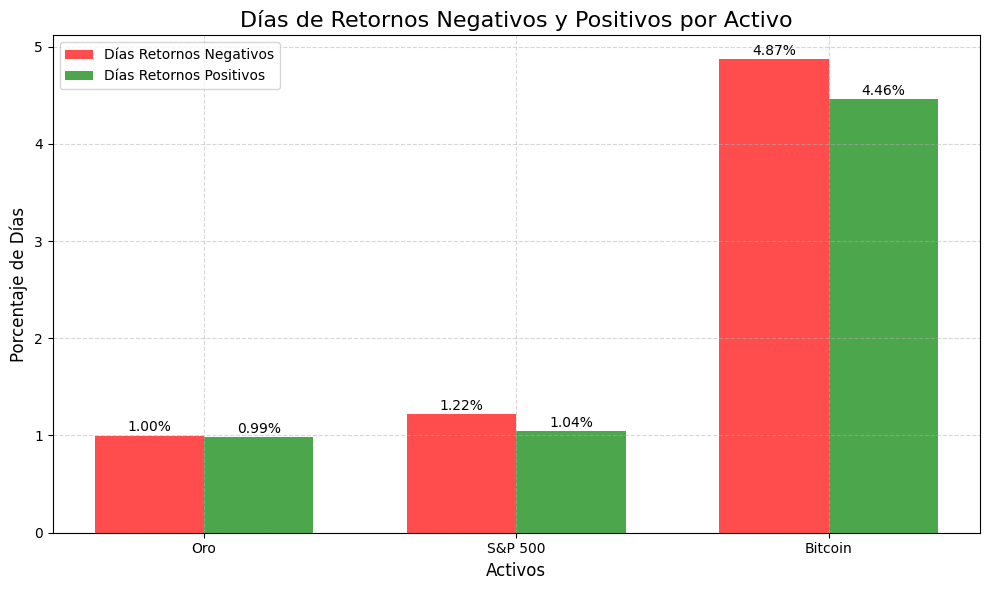

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
activos = ["Oro", "S&P 500", "Bitcoin"]
dias_retornos_negativos = [0.9988499916230263, 1.219216521960896, 4.872345249158272]
dias_retornos_positivos = [0.9852461869833733, 1.0423661034556357, 4.458687121790324]
indices = np.arange(len(activos))
ancho_barra = 0.35

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))


bar1 = ax.bar(indices - ancho_barra/2, dias_retornos_negativos, ancho_barra, label='Días Retornos Negativos', color='red', alpha=0.7)
bar2 = ax.bar(indices + ancho_barra/2, dias_retornos_positivos, ancho_barra, label='Días Retornos Positivos', color='green', alpha=0.7)

# Configuración de etiquetas y título
ax.set_xlabel('Activos', fontsize=12)
ax.set_ylabel('Porcentaje de Días', fontsize=12)
ax.set_title('Días de Retornos Negativos y Positivos por Activo', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(activos)
ax.legend()

# Mostrar los números en las barras
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

# Personalización de la cuadrícula
ax.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




In [35]:

data = pd.DataFrame({'Activos': ["Oro", "S&P 500", "Bitcoin"],
                     'Volatilidad': [1.3, 16.9, 9.2],
                     'Color': ['yellow', 'blue', 'orange']})


fig = px.bar(data, x='Volatilidad', y='Activos', text='Volatilidad', color='Color', color_discrete_map={'yellow': 'gold', 'blue': 'dodgerblue', 'orange': 'darkorange'}, orientation='h')

fig.update_layout(title='Diferencia de volatilidad entres dias positivos y negativos', title_font_size=16)
fig.update_xaxes(title_text='Volatilidad (%)', title_font_size=12)
fig.update_yaxes(title_text='Activos', title_font_size=12)

# Personalización de la fuente
fig.update_traces(textfont_size=12, textposition='inside')

# Ajustar el espacio
fig.update_layout(autosize=False, width=800, height=400)

# Mostrar el gráfico
fig.show()


### Retornos mínimos y máximos diarios 

In [36]:
print(dataframe_btc["oro_rtn"].min()*100)
print(dataframe_btc["sp500_rtn"].min()*100)
print(dataframe_btc["btc_rtn"].min()*100)

-4.630975611591981
-9.511268097833659
-37.169538560117076


In [37]:
print(dataframe_btc["oro_rtn"].max()*100)
print(dataframe_btc["sp500_rtn"].max()*100)
print(dataframe_btc["btc_rtn"].max()*100)

5.947667592334072
9.382773976227554
25.24716942763181


In [38]:

activos = ['Oro', 'Sp500', 'Bitcoin']
max_returns = [5.94, 9.38, 25.24]
min_returns = [-4.63, -9.51, -37.16]

data = {
    'Activos': activos * 2,
    'Tipo': ['Máximo Retorno'] * len(activos) + ['Mínimo Retorno'] * len(activos),
    'Valor': max_returns + min_returns
}

fig = px.bar(data, x='Activos', y='Valor', color='Tipo', text='Valor',
             labels={'Valor': 'Porcentaje'},
             title='Comparación de Retornos Máximos y Mínimos Diarios')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', insidetextanchor='start')
fig.update_layout(xaxis_title='Activos', yaxis_title='')
fig.update_layout(autosize=False, width=800, height=500) 

fig.show()


### Drawdown 


El drawdown es otra medida del riesgo asociado a un activo. En concreto, el drawdown indica  indica la mayor racha de pérdidas de dicho activo. 

In [39]:

def drawdown(precios, nombre):
    #Calculamos el drawdown
    V = precios
    drawdown_btc = (V - V.cummax()) / V.cummax()

    # Graficamos el Drawdown de Bitcoin
    plt.figure(figsize=(12, 6))
    plt.plot(drawdown_btc, color='blue', linewidth=2, label=f'Drawdown {nombre}')
    plt.title(f'Drawdown de {nombre}', fontsize=16)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Drawdown', fontsize=12)

    min_drawdown = drawdown_btc.min()
    plt.axhline(min_drawdown, color='red', linestyle='--', label=f'Mínimo Drawdown: {min_drawdown:.2%}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=12)
    plt.tight_layout()  
    plt.show()

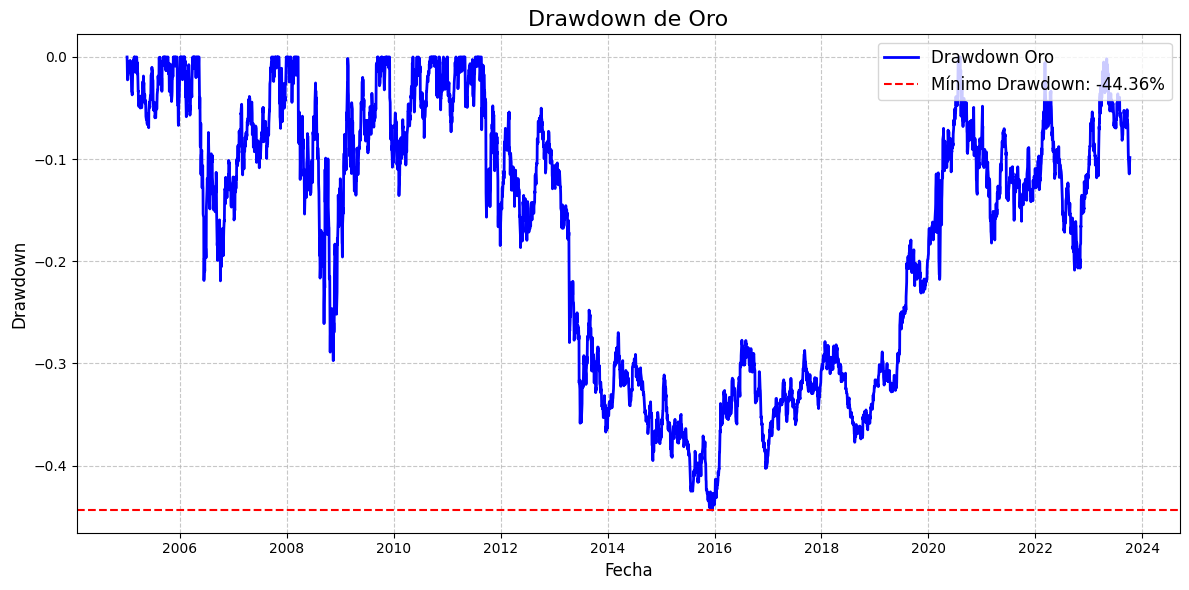

In [40]:
drawdown(dataframe["oro_precio"], "Oro")


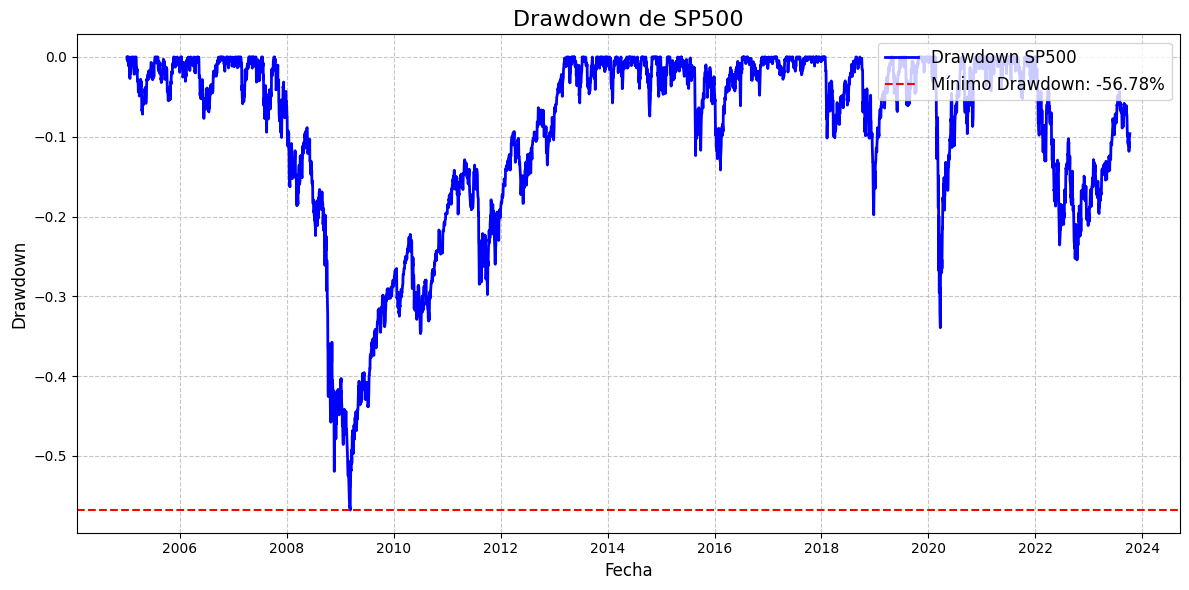

In [41]:
drawdown(dataframe["sp500_precio"], "SP500")

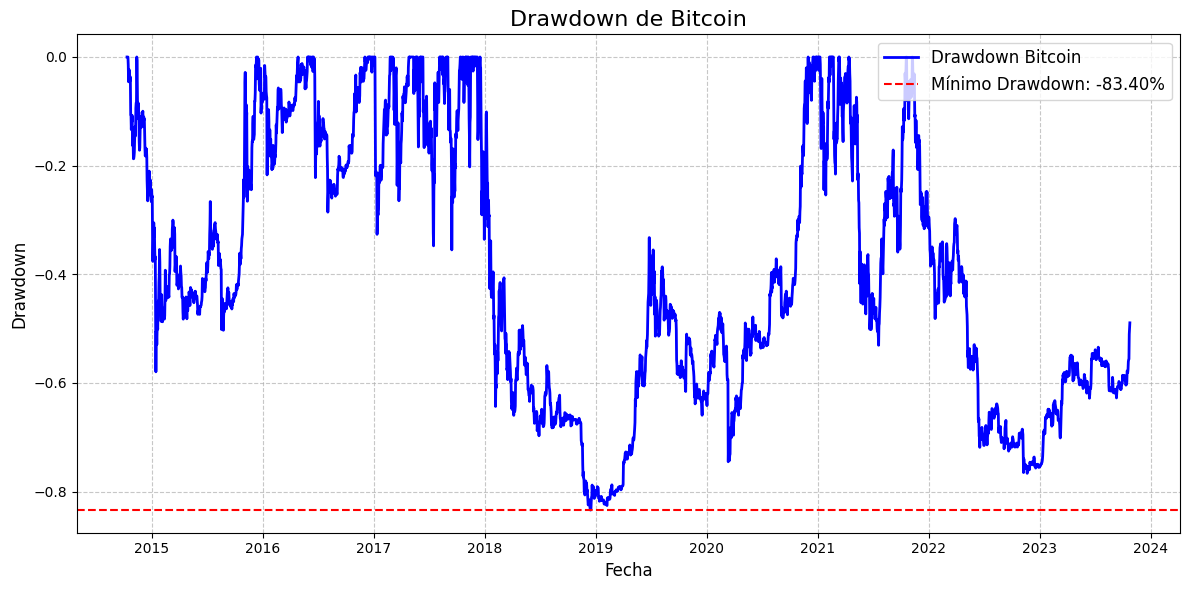

In [42]:

drawdown(dataframe_btc["btc_precio"], "Bitcoin")

In [43]:
import plotly.express as px

activos = ['Oro', 'S&P 500', 'Bitcoin']
drawdowns = [-44, -56, -83]  # Valores en porcentaje

data = {'Activos': activos, 'Drawdown (%)': drawdowns}

fig = px.bar(data, x='Drawdown (%)', y='Activos', text='Drawdown (%)',
             labels={'Drawdown (%)': 'Drawdown (%)'},
             title='Comparación de Drawdowns del Oro S&P 500 y bitcoin')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')
fig.update_layout(xaxis_title='Drawdown (%)', yaxis_title='')

fig.show()


## 

## 4.Value at risk (VAR) y conditional value at risk (CVAR)

En estas sección veremos una de las medidas de riesgo más usadas en finanzas: EL Value at risk (VAR). Hay diferentes maneras de calcularlo, en esta sección lo calcularemos con el método de simulación historica. La elección de este modo de calcularla se debe fundamentalmente a que este método no parte del supuesto de que los retornos sigen una distribución normal -supuesto que, como hemos visto anteriormente, no se cumple-.  

In [44]:
def var_cvar(serie): 
    var_95= np.percentile(serie,5)
    var_99=np.percentile(serie,1)
    cvar_95= serie[serie<var_95].mean()
    cvar_99= serie[serie<var_99].mean()
    return var_95*100,var_99*100, cvar_95*100,cvar_99*100

In [45]:
var_95_oro,var_99_oro,cvar_95_oro,cvar_99_oro=var_cvar(dataframe_btc["oro_rtn"])
print(f"Value at Risk oro al 95%: {var_95_oro}%  Value at Risk oro al 99%: {var_99_oro}%" )
print(f"Conditional value at Risk oro al 95%: {cvar_95_oro}%  Conditional value at Risk oro al 99%: {cvar_99_oro}%" )


Value at Risk oro al 95%: -1.048423227801382%  Value at Risk oro al 99%: -2.0050395872017877%
Conditional value at Risk oro al 95%: -1.7175466391353276%  Conditional value at Risk oro al 99%: -2.7349827152024915%


In [46]:
var_95_sp500,var_99_sp500,cvar_95_sp500,cvar_99_sp500=var_cvar(dataframe_btc["sp500_rtn"])
print(f"Value at Risk sp500 al 95%: {var_95_sp500}%  Value at Risk sp500 al 99%: {var_99_sp500}%" )
print(f"Conditional value at Risk SP500 al 95%: {cvar_95_sp500}%  Conditional value at Risk SP500 al 99%: {cvar_99_sp500}%" )


Value at Risk sp500 al 95%: -1.258360557316655%  Value at Risk sp500 al 99%: -2.805847991557501%
Conditional value at Risk SP500 al 95%: -2.1935736042178724%  Conditional value at Risk SP500 al 99%: -3.8406764520687533%


In [47]:
var_95_btc,var_99_btc,cvar_95_btc,cvar_99_btc=var_cvar(dataframe_btc["btc_rtn"])
print(f"Value at Risk btc al 95%: {var_95_btc}%  Value at Risk btc al 99%: {var_99_btc}%" )
print(f"Conditional value at Risk btc al 95%: {cvar_95_btc}%  Conditional value at Risk btc al 99%: {cvar_99_btc}%" )


Value at Risk btc al 95%: -5.75652344496976%  Value at Risk btc al 99%: -10.467759618477288%
Conditional value at Risk btc al 95%: -8.738016533731367%  Conditional value at Risk btc al 99%: -13.950857398023796%


In [48]:
activos = ['Oro', 'S&P 500', 'Bitcoin']
niveles_confianza = ['95%', '99%']
var_data = [
    [-1.0484, -2.0050],
    [-1.2584, -2.8058],
    [-5.7565, -10.4678]
]

cvar_data = [
    [-1.7175, -2.7350],
    [-2.1936, -3.8407],
    [-8.7380, -13.9509]
]

# Crear un gráfico para VaR
fig_var = go.Figure()

for i, activo in enumerate(activos):
    fig_var.add_trace(go.Bar(
        x=niveles_confianza,
        y=var_data[i],
        name=activo,
        text=[f'{valor:.2f}%' for valor in var_data[i]],
        textposition='inside',
    ))

fig_var.update_layout(
    barmode='group',
    title='Comparación de VaR para Oro, S&P 500 y Bitcoin',
    xaxis=dict(title='Nivel de Confianza'),
    yaxis=dict(title='Porcentaje'),
)

fig_cvar = go.Figure()

for i, activo in enumerate(activos):
    fig_cvar.add_trace(go.Bar(
        x=niveles_confianza,
        y=cvar_data[i],
        name=activo,
        text=[f'{valor:.2f}%' for valor in cvar_data[i]],
        textposition='inside',
    ))

fig_cvar.update_layout(
    barmode='group',
    title='Comparación de CVaR para Oro, S&P 500 y Bitcoin',
    xaxis=dict(title='Nivel de Confianza'),
    yaxis=dict(title='Porcentaje'),
)

fig_var.show()
fig_cvar.show()


## 4.2 Simulación de precios y cálculo del VAR con el método montecarlo

El método montecarlo consiste en simular una serie a partir de una distribución. Dado que nuestras series (como todas las series de retornos) no siguen una distribución normal. El primer paso consistirá en dar con una distribución más cercana a la realidad, a partir de la cual se puedan realizar simulaciones plausibles.

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/457269008.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




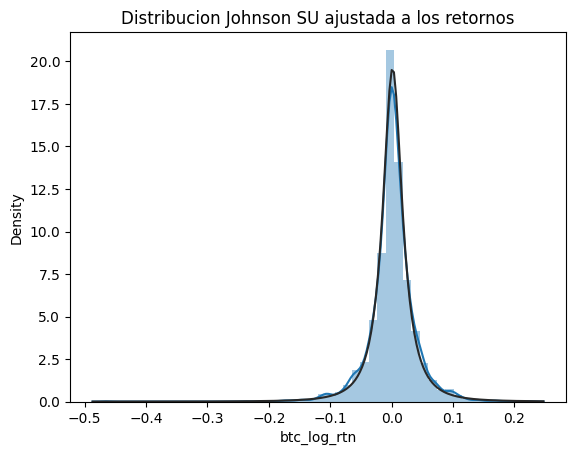

In [49]:
from scipy import stats
sns.distplot(dataframe_btc["btc_log_rtn"], fit=stats.johnsonsu, kde=True)
plt.title('Distribucion Johnson SU ajustada a los retornos')
plt.show()

In [50]:

def var_montecarlo (prices, n_sims = 2000, ci=0.95, steps = 30, plot=False):
    
    # Calcula los parametros para ajustar la distribución a la serie de retornos históricos
    params = stats.johnsonsu.fit(prices.pct_change().dropna())
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    
    # Simulamos los retornos futuros según la distribución ajustada y calcula los precios futuros.
    simulations = pd.DataFrame()
    for sim in range(n_sims):
        jrets = stats.johnsonsu.rvs(loc=loc, scale=scale, *arg, size=steps)
        mc_price =  np.cumprod(jrets + 1) * prices.iloc[-1]
        mc_price = np.insert(mc_price,0, prices.iloc[-1])
        simulations[sim] = mc_price
    ret_mes = (simulations.iloc[-1] / simulations.iloc[0]) - 1 
    var_mc = -round(ret_mes.quantile(1 - ci),6)
    
    if plot:
        simulations.plot(legend=False, alpha=0.5)
        plt.title('Simulaciones de precios futuros'.upper(), fontsize=18, color='brown')
        
        plt.text(0, 21, 'El VaR 95 mensual por el metodo Monte Carlo es de {}%'.format(round(var_mc*100,2)), 
                 fontsize=10, color='navy')
        plt.show()
        
        sns.distplot((simulations.iloc[-1]/simulations.iloc[0])-1 , kde=True, color='darkolivegreen')
        plt.title('Distribucion de los retornos finales simulados'.upper(), fontsize=18, color='brown')
        plt.vlines(-var_mc, 0,2, linestyle='dashed', color='crimson')
        plt.text(-var_mc-0.1,2.2,'VaR 95 = {:.2f}%'.format(var_mc*100), fontsize=15, color='navy' )
        plt.show()
    
   

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/740296663.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



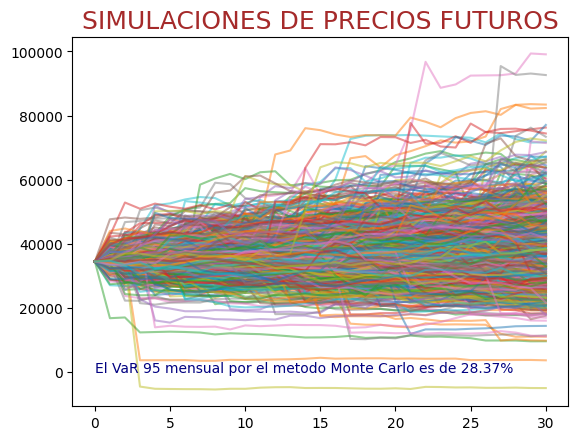

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/740296663.py:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




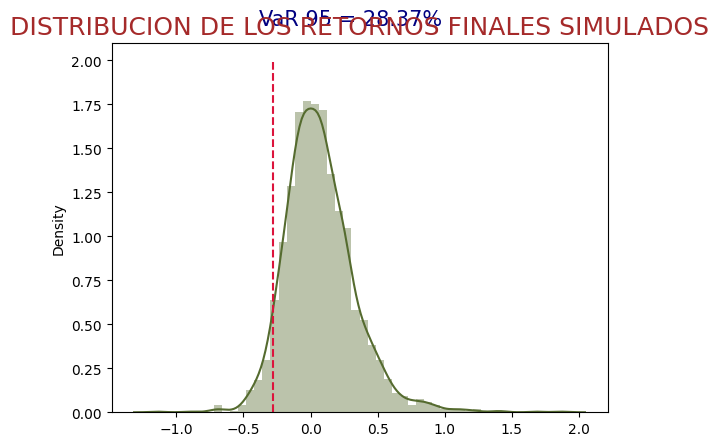

In [51]:

var_montecarlo(dataframe_btc["btc_precio"],plot=True)

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/740296663.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



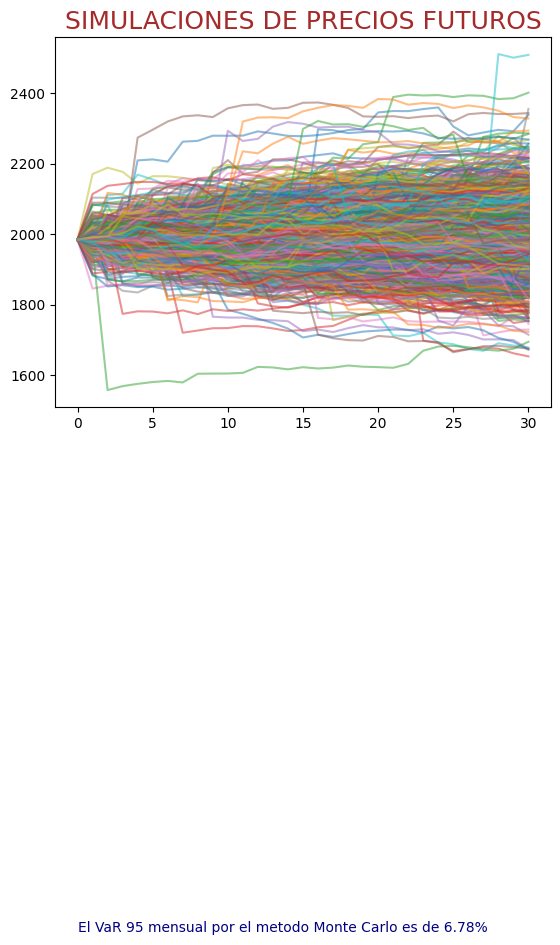

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/740296663.py:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




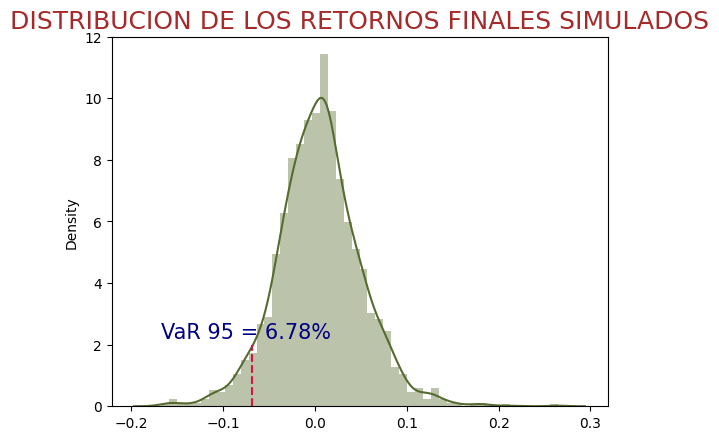

In [52]:
var_montecarlo(dataframe_btc["oro_precio"],plot=True)

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/740296663.py:15: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



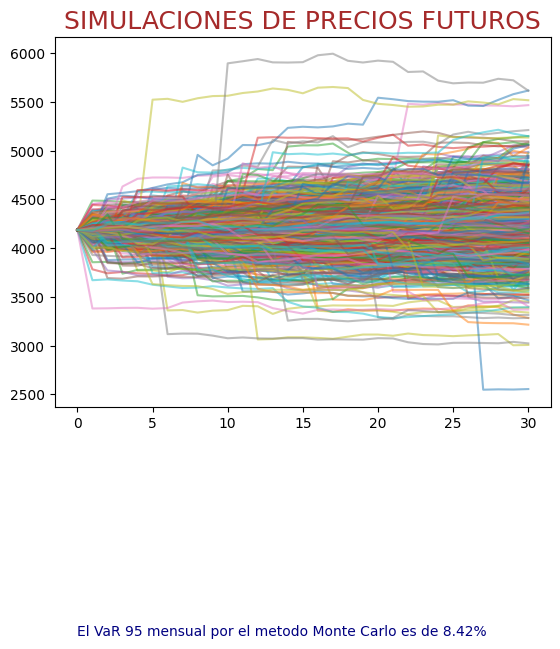

/var/folders/b9/4nb2k3j92lx258swghfc_3q00000gn/T/ipykernel_35585/740296663.py:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




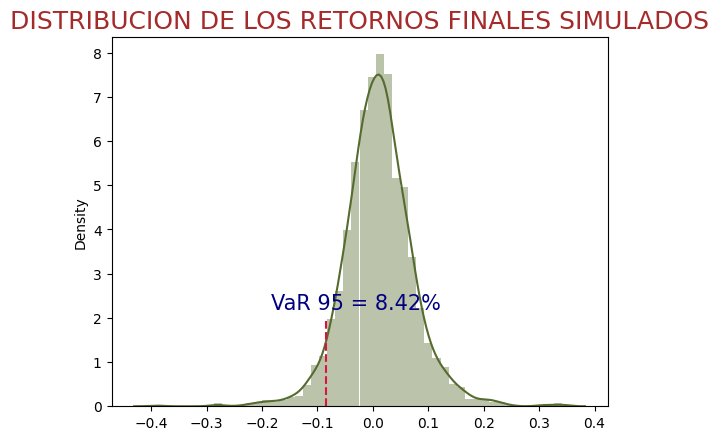

In [53]:
var_montecarlo(dataframe_btc["sp500_precio"],plot=True)